In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from string import punctuation
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [445]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [513]:
df["text"][110]

'Subject: the database that bill gates doesnt want you to know about ! ! ! ! !  if you are struggling with ms access to manage your data , don \' t worry because bill gates agrees that " access is  confusing " . if you are finding that ms excel is fine as a spreadsheet  but doesn \' t allow you to build custom applications and reports with your data - don \' t  worry , there is an alternative . the good news is that 1 million customers have found a  really good alternativetry our  database software that does not make you feel like a dummy for free . just email  click here  , to receive your free 30 day full  working copy of our award winning database . then you can decide foryourself . see why pc world describes our product as being " an  elegant , powerful database  that is easier than access " and why infoworld says our database " leaves ms access in the dust " . we have been in  business since 1982 and are acknowledged as the leader in powerful but useabledatabases to solve your bus

In [447]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [449]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [450]:
df.duplicated().sum()

33

In [451]:
df.drop_duplicates(keep='first', inplace=True)

In [452]:
df.duplicated().sum()

0

In [453]:
df.shape

(5695, 2)

In [454]:
df["spam"].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

##EDA

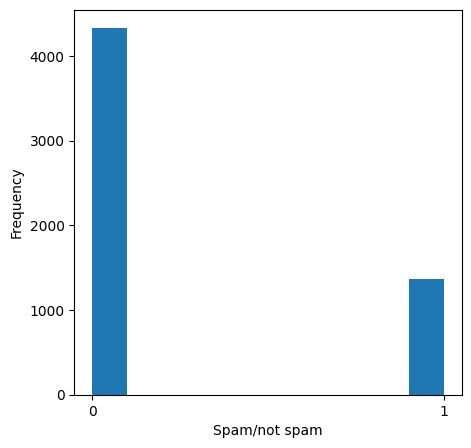

In [455]:
plt.figure(figsize=(5,5))
plt.hist(df["spam"])
labels = [0,1]
plt.xticks(labels)
plt.xlabel("Spam/not spam")
plt.ylabel("Frequency")
plt.show()

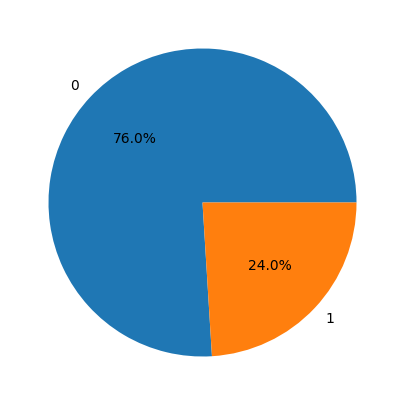

In [456]:
plt.figure(figsize=(5,5))
plt.pie(df["spam"].value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()
labels = ["Not Spam","Spam"]
plt.show()

In [457]:
import nltk

In [458]:
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [459]:
df["Character_Count"]=df["text"].apply(len)

In [460]:
df.head(1)

,text,spam,Character_Count
0,Subject: naturally irresistible your corporate...,1,1484


In [461]:
df["Word_Count"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [462]:
df["Sent_count"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [463]:
df.head()

,text,spam,Character_Count,Word_Count,Sent_count
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [464]:
df[df["spam"]==0][["Character_Count","Word_Count","Sent_count"]].describe()

,Character_Count,Word_Count,Sent_count
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [465]:
df[df["spam"]==1][["Character_Count","Word_Count","Sent_count"]].describe()

,Character_Count,Word_Count,Sent_count
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


<Axes: xlabel='Character_Count', ylabel='Count'>

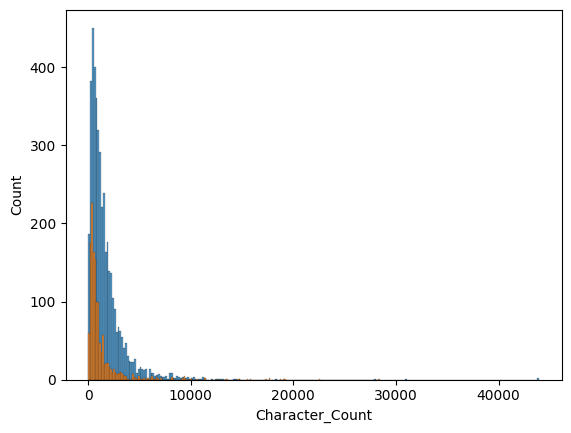

In [466]:
sns.histplot(df[df["spam"]==0]["Character_Count"])
sns.histplot(df[df["spam"]==1]["Character_Count"])

<Axes: xlabel='Word_Count', ylabel='Count'>

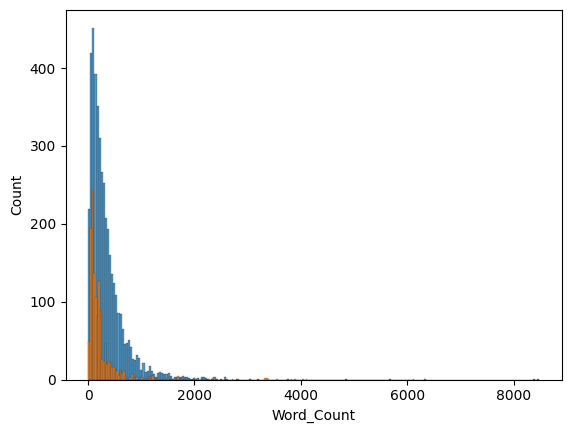

In [467]:
sns.histplot(df[df["spam"]==0]["Word_Count"])
sns.histplot(df[df["spam"]==1]["Word_Count"])

<Axes: xlabel='Sent_count', ylabel='Count'>

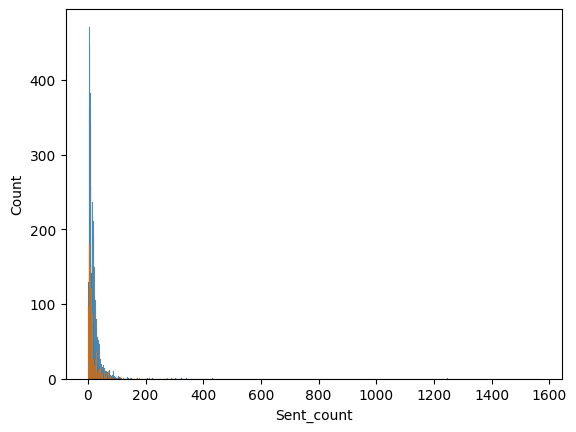

In [468]:
sns.histplot(df[df["spam"]==0]["Sent_count"])
sns.histplot(df[df["spam"]==1]["Sent_count"])

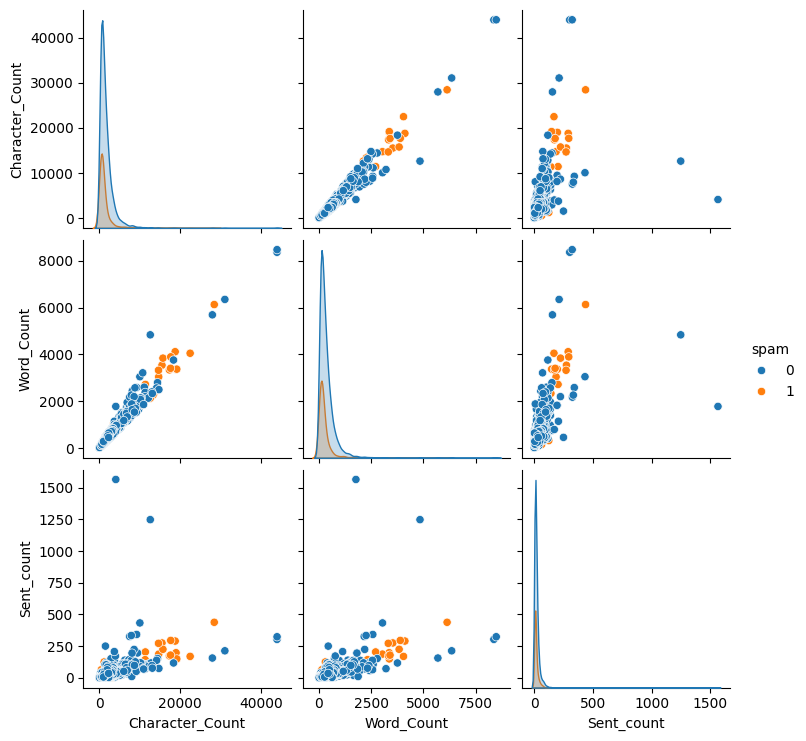

In [469]:
sns.pairplot(df, hue="spam")

In [470]:
numeric_df = df.select_dtypes(include=np.number)

<Axes: >

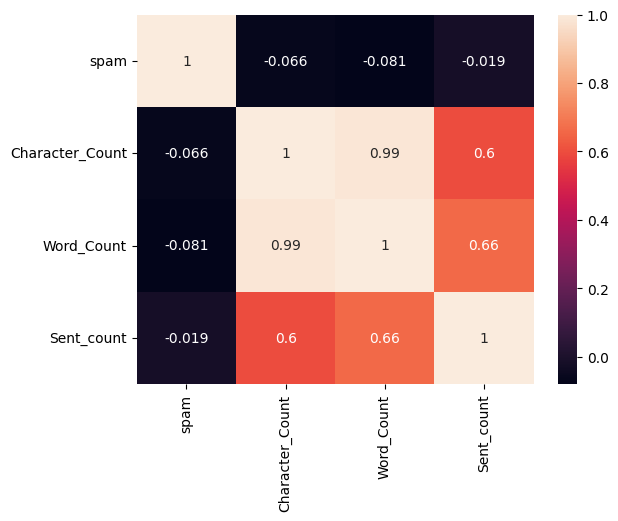

In [471]:
sns.heatmap(numeric_df.corr(),annot=True)


##Text Preprocessing

In [472]:
def test_preprocess(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()


  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  ps=PorterStemmer()
  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [473]:
df["Transformed_text"]=df["text"].apply(test_preprocess)


In [474]:
df.head()

,text,spam,Character_Count,Word_Count,Sent_count,Transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


##Model Building

In [492]:
X = df["Transformed_text"].astype(str)
y = df["spam"]

In [493]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [494]:
tfidf= TfidfVectorizer(max_features=5000)

In [495]:
X= tfidf.fit_transform(X).toarray()

In [496]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X= scaler.fit_transform(X)

In [497]:
#appending Sentence Count to X to check if it improve model performance
# X = np.hstack((X, df["Sent_count"].values.reshape(-1,1)))

In [498]:
X.shape

(5695, 5000)

In [499]:
y.shape

(5695,)

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [501]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4556, 5000)
(1139, 5000)
(4556,)
(1139,)


In [502]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [503]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [504]:
GNB.fit(X_train,y_train)
y_pred1 = GNB.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95171202809482
[[841   8]
 [ 47 243]]
0.9681274900398407


In [505]:
MNB.fit(X_train,y_train)
y_pred2 = MNB.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9824407374890255
[[848   1]
 [ 19 271]]
0.9963235294117647


In [506]:
BNB.fit(X_train,y_train)
y_pred3 = BNB.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9578577699736611
[[802  47]
 [  1 289]]
0.8601190476190477


In [508]:
import pickle
pickle.dump(tfidf,open("Tfidf.pkl","wb"))
pickle.dump(MNB,open("MNB.pkl","wb"))

In [510]:
!pip show scikit-learn



Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: albumentations, bigframes, fastai, imbalanced-learn, librosa, mlxtend, sklearn-pandas, yellowbrick
